In [1]:
import partridge as ptg
import networkx as nx
import pandas as pd
import osmnx as ox
import peartree as pt
from datetime import date
from typing import Tuple
import geopandas as gpd

In [25]:
fd=ptg.load_feed(inpath)

In [26]:
agency=fd.agency
agency

agency_id                          agency_name              agency_url  \
0         372                        Pays de Meaux  http://www.navitia.io/   
1        1006                        Pays de Meayx  http://www.navitia.io/   
2         955            Express 100 Torcy-Créteil  http://www.navitia.io/   
3         822                   Keolis Orly Rungis  http://www.navitia.io/   
4         947              Aéroport Paris Beauvais  http://www.navitia.io/   
5          95                          Express A14  http://www.navitia.io/   
6         319                                Filéo  http://www.navitia.io/   
7         914                                  KMR  http://www.navitia.io/   
8         758                        Busval d'Oise  http://www.navitia.io/   
9         584                                  TAM  http://www.navitia.io/   
10        750                      MAGICAL SHUTTLE  http://www.navitia.io/   
11        302                              Com'Bus  http://www.navitia.io/   
12        303                            Actipôles  http://www.navitia.io/   
13        285                               Phébus  http://www.navitia.io/   
14        782                                Titus  http://www.navitia.io/   
15        783                        Aubergenville  http://www.navitia.io/   
16        881                         Paris-Saclay  http://www.navitia.io/   
17        658                                  ADP  http://www.navitia.io/   
18        441                              Navette  http://www.navitia.io/   
19        916                    Seine-Saint-Denis  http://www.navitia.io/   
20       1017            Transport du Val de Seine  http://www.navitia.io/   
21        410                          CARS PERRON  http://www.navitia.io/   
22         35                           CARS SOEUR  http://www.navitia.io/   
23        951                               VALBUS  http://www.navitia.io/   
24        950                Commune de Bouffemont  http://www.navitia.io/   
25         30                          CARS MOREAU  http://www.navitia.io/   
26        870                          VIAMO-MELUN  http://www.navitia.io/   
27        420                              Paladin  http://www.navitia.io/   
28        308                              PROCARS  http://www.navitia.io/   
29        388                              Siyonne  http://www.navitia.io/   
..        ...                                  ...                     ...   
94        990                            Tam Limay  http://www.navitia.io/   
95        968  Express 19 Les Mureaux - Versailles  http://www.navitia.io/   
96        967                         Val de Seine  http://www.navitia.io/   
97        898      Transdev Ile-de-France Conflans  http://www.navitia.io/   
98        295                                R'bus  http://www.navitia.io/   
99         14                         Bus en Seine  http://www.navitia.io/   
100       132                           Traverciel  http://www.navitia.io/   
101       855                Scolaire Est Yvelines  http://www.navitia.io/   
102       266                 Entre Seine et Forêt  http://www.navitia.io/   
103       961                            Express 1  http://www.navitia.io/   
104       960                          Poissy Aval  http://www.navitia.io/   
105       975                           Express 16  http://www.navitia.io/   
106       974                              Résalys  http://www.navitia.io/   
107       896                        LE BUS DIRECT  http://www.navitia.io/   
108      1001                                 Rémi  http://www.navitia.io/   
109       422                        LOSAY VOYAGES  http://www.navitia.io/   
110       639                   AUTOCARS DOMINIQUE  http://www.navitia.io/   
111       929                      Plateau de Brie  http://www.navitia.io/   
112       930                             Brie Bus  http://www.navitia.io/   
113       127             

In [42]:
fd.routes

route_id agency_id route_short_name  \
0            067167006:G       372                G   
1           067067103:Fs      1006               Fs   
2            067067003:F       372                F   
3            067067002:J       372                J   
4            067167009:I       372                I   
5            067167004:H       372                H   
6            067067005:C       372                C   
7            067167001:B       372                B   
8            067167002:A       372                A   
9           067167103:Es       372               Es   
10           067167003:E       372                E   
11           067167008:D       372                D   
12          067167110:Ns       372               Ns   
13           067167010:N       372                N   
14          067067120:Ms       372               Ms   
15          067067202:Qs       372               Qs   
16          067167105:Os       372               Os   
17           067167005:O       372                O   
18          067067164:Ks       372               Ks   
19           067067064:K       372                K   
20          067067102:Js       372               Js   
21           067067020:M       372                M   
22          067067117:Ls       372               Ls   
23           067067017:L       372                L   
24         254177100:100       955              100   
25     287191100:191-100       822          191-100   
26    287094001:GOCparis       822        GO Cparis   
27    503503001:Beauvais       947         Beauvais   
28         057314100:100        95              100   
29      057314143:ExpA14        95          Exp A14   
...                  ...       ...              ...   
1843            800:N141        56             N141   
1844            800:N134        56             N134   
1845            800:N135        56             N135   
1846               810:B       741                B   
1847               800:C       741                C   
1848           800:C:Bus       741                C   
1849               800:U       742                U   
1850           800:U:Bus       742                U   
1851               810:A       741                A   
1852           810:A:Bus       741                A   
1853             800:TER       743              TER   
1854             800:T11       440              T11   
1855               800:D       741                D   
1856           800:D:Bus       741                D   
1857               800:E       741                E   
1858           800:E:Bus       741                E   
1859               800:J       742                J   
1860           800:J:Bus       742                J   
1861               800:K       742                K   
1862              800:T4       440               T4   
1863               800:H       742                H   
1864           800:H:Bus       742                H   
1865               800:P       742                P   
1866           800:P:Bus       742                P   
1867               800:R       742                R   
1868           800:R:Bus       742                R   
1869               800:L       742                L   
1870           800:L:Bus       742                L   
1871               800:N       742                N   
1872           800:N:Bus       742                N   

                                 route_long_name route_desc  route_type  \
0                                              G        NaN           3   
1                                             Fs        NaN           3   
2                                              F        NaN           3   
3                                              J        NaN           3   
4                                              I        NaN           3   
5                                              H        NaN           3   
6                                              C        NaN           3   
7    

In [19]:
fd._config.nodes()

NodeView(('agency.txt', 'routes.txt', 'calendar.txt', 'trips.txt', 'calendar_dates.txt', 'fare_attributes.txt', 'fare_rules.txt', 'stops.txt', 'frequencies.txt', 'shapes.txt', 'stop_times.txt', 'transfers.txt', 'feed_info.txt'))

In [31]:
outpath='C:\\Users\\76571\\Desktop\\GTFS'

In [32]:
ptg.extract_feed(inpath,outpath,{'routes.txt':{'route_type':1}})

'C:\\Users\\76571\\Desktop\\GTFS.zip'

In [28]:
help(ptg)

Help on package partridge:

NAME
    partridge

PACKAGE CONTENTS
    __version__
    config
    geo
    gtfs
    parsers
    readers
    types
    utilities
    writers

FUNCTIONS
    extract_feed(inpath: str, outpath: str, view: Dict[str, Dict[str, Any]], config: networkx.classes.digraph.DiGraph = None) -> str
        Extract a subset of a GTFS zip into a new file
    
    load_feed(path: str, view: Union[Dict[str, Dict[str, Any]], NoneType] = None, config: Union[networkx.classes.digraph.DiGraph, NoneType] = None) -> partridge.gtfs.Feed
    
    load_geo_feed(path: str, view: Union[Dict[str, Dict[str, Any]], NoneType] = None) -> partridge.gtfs.Feed
    
    load_raw_feed(path: str) -> partridge.gtfs.Feed
    
    read_busiest_date(path: str) -> Tuple[datetime.date, FrozenSet[str]]
        Find the earliest date with the most trips
    
    read_busiest_week(path: str) -> Dict[datetime.date, FrozenSet[str]]
        Find the earliest week with the most trips
    
    read_dates_by_servi

In [33]:
inpath2='C:\\Users\\76571\\Desktop\\GTFS.zip'

In [34]:
fd2=ptg.load_feed(inpath2)

In [35]:
fd2.routes

route_id agency_id route_short_name route_long_name route_desc  \
0    100110005:5       439                5               5        NaN   
1    100110004:4       439                4               4        NaN   
2    100110006:6       439                6               6        NaN   
3   100110107:7B       439               7B              7B        NaN   
4    100110007:7       439                7               7        NaN   
5   100110103:3B       439               3B              3B        NaN   
6   100110013:13       439               13              13        NaN   
7   100110012:12       439               12              12        NaN   
8   100110014:14       439               14              14        NaN   
9    100110003:3       439                3               3        NaN   
10   100110002:2       439                2               2        NaN   
11   100110008:8       439                8               8        NaN   
12   100110009:9       439                9               9        NaN   
13   100110001:1       439                1               1        NaN   
14  100110011:11       439               11              11        NaN   
15  100110010:10       439               10              10        NaN   

    route_type route_url route_color route_text_color  
0            1       NaN      FF7E2E           000000  
1            1       NaN      CF009E           FFFFFF  
2            1       NaN      6ECA97           000000  
3            1       NaN      6ECA97           000000  
4            1       NaN      FA9ABA           000000  
5            1       NaN      6EC4E8           000000  
6            1       NaN      6EC4E8           000000  
7            1       NaN      007852           FFFFFF  
8            1       NaN      62259D           FFFFFF  
9            1       NaN      837902           FFFFFF  
10           1       NaN      003CA6           FFFFFF  
11           1       NaN      E19BDF           000000  
12           1       NaN      B6BD00           000000  
13           1       NaN      FFCD00           000000  
14           1       NaN      704B1C           FFFFFF  
15           1       NaN      C9910D           000000

In [36]:
date_choise = '2019/06/20'

In [65]:
import feed_to_routes as fr

In [38]:
new_feed = fr.Feed_To_Routes(inpath2, date_choise)

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

(<Figure size 1149.8x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ec01bbe7f0>)

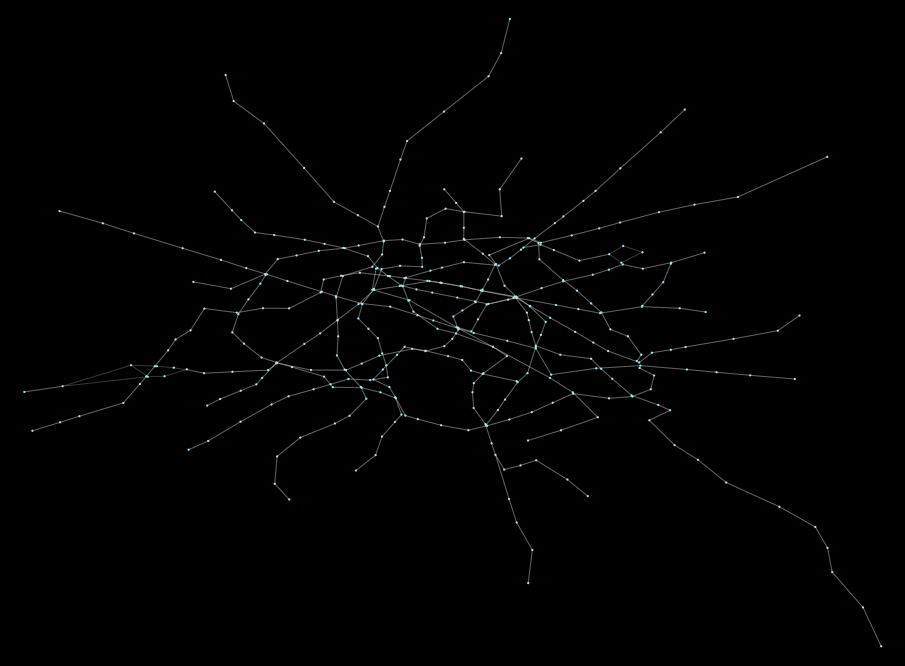

In [41]:
ox.plot_graph(new_feed.G,
              fig_height=12,
                show=False,
                close=False,
                node_color='#8aedfc',
                node_size=5,
                edge_color='#e2dede',
                edge_alpha=0.25,
                bgcolor='black')

In [43]:
outpath2='C:\\Users\\76571\\Desktop\\GTFS_RER_METRO.zip'

In [48]:
ptg.extract_feed(inpath,outpath2,{'routes.txt':{'route_type':(1,2)}})

'C:\\Users\\76571\\Desktop\\GTFS_RER_METRO.zip'

In [58]:
inpath3='C:\\Users\\76571\\Desktop\\GTFS_RER_METRO.zip'

In [59]:
fd3=ptg.load_feed(inpath3)

In [60]:
fd3.routes

route_id agency_id route_short_name route_long_name route_desc  \
0    100110005:5       439                5               5        NaN   
1    100110004:4       439                4               4        NaN   
2    100110006:6       439                6               6        NaN   
3   100110107:7B       439               7B              7B        NaN   
4    100110007:7       439                7               7        NaN   
5   100110103:3B       439               3B              3B        NaN   
6   100110013:13       439               13              13        NaN   
7   100110012:12       439               12              12        NaN   
8   100110014:14       439               14              14        NaN   
9    100110003:3       439                3               3        NaN   
10   100110002:2       439                2               2        NaN   
11   100110008:8       439                8               8        NaN   
12   100110009:9       439                9               9        NaN   
13   100110001:1       439                1               1        NaN   
14  100110011:11       439               11              11        NaN   
15  100110010:10       439               10              10        NaN   
16         810:B       741                B               B        NaN   
17         800:C       741                C               C        NaN   
18         800:U       742                U               U        NaN   
19         810:A       741                A               A        NaN   
20       800:TER       743              TER             TER        NaN   
21         800:D       741                D               D        NaN   
22         800:E       741                E               E        NaN   
23         800:J       742                J               J        NaN   
24         800:K       742                K               K        NaN   
25         800:H       742                H               H        NaN   
26         800:P       742                P               P        NaN   
27         800:R       742                R               R        NaN   
28         800:L       742                L               L        NaN   
29         800:N       742                N               N        NaN   

    route_type route_url route_color route_text_color  
0            1       NaN      FF7E2E           000000  
1            1       NaN      CF009E           FFFFFF  
2            1       NaN      6ECA97           000000  
3            1       NaN      6ECA97           000000  
4            1       NaN      FA9ABA           000000  
5            1       NaN      6EC4E8           000000  
6            1       NaN      6EC4E8           000000  
7            1       NaN      007852           FFFFFF  
8            1       NaN      62259D           FFFFFF  
9            1       NaN      837902           FFFFFF  
10           1       NaN      003CA6           FFFFFF  
11           1       NaN      E19BDF           000000  
12           1       NaN      B6BD00           000000  
13           1       NaN      FFCD00           000000  
14           1       NaN      704B1C           FFFFFF  
15           1       NaN      C9910D           000000  
16           2       NaN      4B92DB           FFFFFF  
17           2       NaN      F3D311           000000  
18           2       NaN      DE4F75           FFFFFF  
19           2       NaN      F7403A           FFFFFF  
20           2       NaN      000000           FFFFFF  
21           2       NaN      3F9C35           FFFFFF  
22           2       NaN      DE81D3           FFFFFF  
23           2       NaN      B6BF00           FFFFFF  
24           2       NaN      AE9A00           000000  
25           2       NaN      844C54           000000  
26           2       NaN      EAAB00           000000  
27           2       NaN      E59FDB           000000  
28           2       NaN      7577C0           FFFFFF  
29           2       NaN      00B

In [53]:
inpath4='C:\\Users\\76571\\Desktop\\stage\\gtfs-lines-last.zip'

In [54]:
fd4=ptg.load_feed(inpath4)

In [55]:
fd4.routes

route_id agency_id route_short_name  \
0   DUA800853021    DUA853                H   
1   DUA800853521    DUA853                H   
2   DUA800854541    DUA854                J   
3   DUA800852551    DUA852                N   
4   DUA800854542    DUA854                L   
5   DUA800804581    DUA804                D   
6   DUA800803571    DUA803                C   
7   DUA800805591    DUA805                E   
8   DUA800855548    DUA855                U   
9   DUA800850509    DUA850               T4   
10  DUA800850011    DUA850                P   
11  DUA800852051    DUA852                N   
12  DUA800855048    DUA855                U   
13  DUA800851081    DUA851                R   
14  DUA800854042    DUA854                L   
15  DUA800805091    DUA805                E   
16  DUA800804081    DUA804                D   
17  DUA800853022    DUA853                K   
18  DUA800854041    DUA854                J   
19  DUA800850009    DUA850               T4   
20  DUA800850012    DUA850              T11   
21  DUA810802061    DUA802                B   
22  DUA810801041    DUA801                A   
23  DUA800803071    DUA803                C   
24  DUA800850511    DUA850                P   
25  DUA800851581    DUA851                R   
26  DUA810801541    DUA801                A   

                                      route_long_name route_desc  route_type  \
0   Gare du Nord - Pontoise / Luzarches / Beauvais...        NaN           2   
1   Gare du Nord - Pontoise / Luzarches / Beauvais...        NaN           3   
2   Gare St-Lazare - Ermont Eaubonne / Vernon / Gi...        NaN           3   
3   Gare Montparnasse / Gare Montparnasse Vaugirar...        NaN           3   
4   Gare St-Lazare - Versailles R. Droite / Cergy ...        NaN           3   
5      Creil - Corbeil Essonnes / Melun / Malesherbes        NaN           3   
6   Pontoise / Versailles R. Gauche / St-Quentin e...        NaN           3   
7   Haussmann Saint-Lazare - Chelles Gournay / Tou...        NaN           3   
8               La Défense Grande Arche - La Verrière        NaN           3   
9                            Aulnay sous Bois - Bondy        NaN           3   
10  Gare de l'Est - La Ferté Milon / Château-Thier...        NaN           2   
11  Gare Montparnasse / Gare Montparnasse Vaugirar...        NaN           2   
12              La Défense Grande Arche - Rambouillet        NaN           2   
13  Gare de Lyon / Gare de Bercy - Montereau / Mon...        NaN           2   
14  Gare St-Lazare - Versailles R. Droite / Cergy ...        NaN           2   
15  Haussmann Saint-Lazare - Chelles Gournay / Tou...        NaN           2   
16     Creil - Corbeil Essonnes / Melun / Malesherbes        NaN           2   
17                     Gare du Nord - Crépy en Valois        NaN           2   
18  Gare St-Lazare - Ermont Eaubonne / Vernon / Gi...        NaN           2   
19                           Aulnay sous Bois - Bondy        NaN           0   
20                                                T11        NaN           0   
21  Aéroport CDG 2 / Mitry Claye - Robinson / St-R...        NaN           2   
22  Cergy Le Haut / Poissy / St-Germain-en-Laye - ...        NaN           2   
23  Pontoise / Versailles R. Gauche / St-Quentin e...        NaN           2   
24  Gare de l'Est - La Ferté Milon / Château-Thier...        NaN           3   
25  Gare de Lyon / Gare de Bercy - Montereau / Mon...        NaN           3   
26                                          Travaux A        NaN           3   

   route_url route_color route_text_color  
0        NaN      844C54           FFFFFF  
1        NaN      7B4339           FFFFFF  
2        NaN      CDCD00           FFFFFF  
3        NaN      00A092           FFFFFF  
4        NaN      7584BC           FFFFFF  
5        NaN      5E9620           FFFFFF  
6        NaN      FCD946           FFFFFF  
7        NaN      BD76A1           FFFFFF  
8        NaN      D60058           FFFFFF  
9        N

In [63]:
from My_count import *

In [66]:
count(fd3.stops.zone_id)

{'2': 75, '1': 383, '4': 122, '3': 86, '5': 261, '100': 49}

In [67]:
new_feed = fr.Feed_To_Routes(inpath3, date_choise)

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib\site-packages\peartree\toolkit.py:159: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return (np.isnan(y), lambda z: z.nonzero()[0])
C:\ProgramData\Anaconda3\lib

(<Figure size 1393.09x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ec4d625080>)

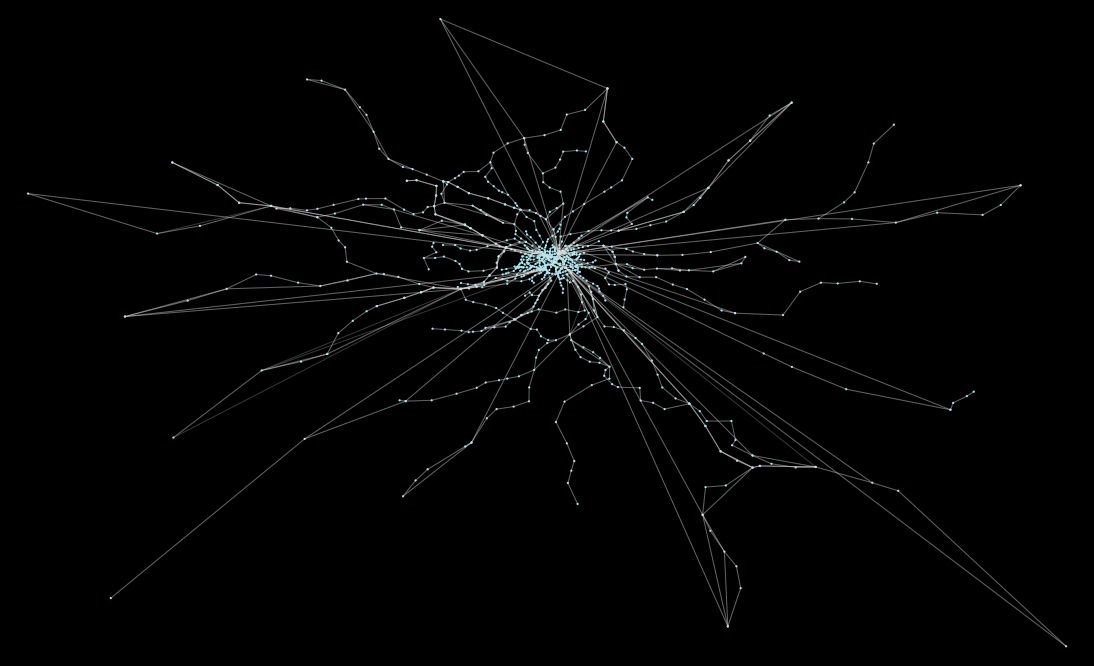

In [68]:
ox.plot_graph(new_feed.G,
              fig_height=12,
                show=False,
                close=False,
                node_color='#8aedfc',
                node_size=5,
                edge_color='#e2dede',
                edge_alpha=0.25,
                bgcolor='black')

In [69]:
NOISY_CHAMPS = [48.842885,2.580086]
LOUVRES = [49.049326,2.501758]
TORCY = [48.839646,2.65513]
POISSY = [48.933265,2.041072]
LYON = [48.843773,2.373916]
FONTENAY = [48.853796,2.488188]
MAGENTA = [48.880563,2.358148]
SEC = [48.896652,2.458363]
ROSNY = [48.883016,2.482367]
VINCENNES = [48.847491,2.433216]
NATION = [48.84847,2.396439]
ORRY = [49.138717,2.489615] 
GARE_NORD = [48.879458,2.357358]
PONTOISE = [49.04681,2.094921]
LES_SAULES = [48.746167,2.417144]
PANTIN = [48.897307,2.400709]
HAUSSMANN = [48.875253,2.326692]
DRANCY = [48.932942,2.454995]
SUCY = [48.771395,2.507372]
ISSY = [48.819674,2.25876]
DAME = [48.853021,2.344641]
CHATELET = [48.861822,2.347013]
ABLON = [48.725535,2.419565]
DRANCY = [48.932942,2.454995]
CHATELET = [48.861564,2.346976]
NOTRENAME = [48.853021,2.344641]
CERGY_LE_HAUT = [49.047876,2.011]
NANTERRE_UNIV = [48.901746,2.215111]
ROSA = [48.896012,2.372709]
MAGENTA = [48.881447,2.35878]
RUEIL = [48.887574,2.172579]
VESINET = [48.897973,2.122117]
ARCUEIL = [48.798785,2.326232]
NOISY_CHAMPS = [48.842599,2.578463]
HOUILLES = [48.919989,2.185268]
CHESSY = [48.870833,2.783689]
CRETEIL = [48.773318,2.436146]

In [70]:
test_path=new_feed.get_shortest_path(TORCY,SUCY)

In [71]:
test_path

['1DS5L_StopPoint:8775837:810:A',
 '1DS5L_StopPoint:8775836:810:A',
 '1DS5L_StopPoint:8775834:810:A',
 '1DS5L_StopPoint:8775833:810:A',
 '1DS5L_StopPoint:8775832:810:A',
 '1DS5L_StopPoint:8775830:810:A',
 '1DS5L_StopPoint:8775811:810:A',
 '1DS5L_StopPoint:8775812:810:A',
 '1DS5L_StopPoint:8775813:810:A',
 '1DS5L_StopPoint:8775814:810:A',
 '1DS5L_StopPoint:8775815:810:A',
 '1DS5L_StopPoint:8775816:810:A',
 '1DS5L_StopPoint:8775817:810:A',
 '1DS5L_StopPoint:8775818:810:A',
 '1DS5L_StopPoint:8775819:810:A']

In [72]:
from shapely.geometry import LineString, Point
from peartree.toolkit import great_circle_vec

In [73]:
def make_nodes_df(G, node_list):
    pts = []
    for n in node_list:
        node = G.nodes[n]
        pts.append(Point(node['x'], node['y']))
    return gpd.GeoDataFrame(geometry=pts)

In [74]:
def make_edges_df(G, node_list):
    pts = []
    for n in node_list:
        node = G.nodes[n]
        pts.append(Point(node['x'], node['y']))
    edges = []
    for a, b in zip(pts[:-1], pts[1:]):
        edges.append(LineString([a, b]))
    dts = []
    modes = []
    distances = []
    for a, b in zip(node_list[:-1], node_list[1:]):
        dts.append(G[a][b][0]['length'])
        modes.append(G[a][b][0]['mode'])
        # This is a hacky attempt to estimate the 
        # distance covered by this portion of the route
        # by calculating the great circle distance between
        # two stops. What would be better would be to actually
        # use the shapes from the GTFS to calculate the true
        # distance along the route, but this is good enough
        # for a sketch example
        ds = great_circle_vec(
            G.nodes[a]['x'],
            G.nodes[a]['y'],
            G.nodes[b]['x'],
            G.nodes[b]['y'])
        distances.append(ds)
    print(modes)
    return gpd.GeoDataFrame({
        'from': node_list[:-1],
        'to': node_list[1:],
        'distance': distances,
        'mode': modes,
        'time': dts
    }, geometry=edges)

In [75]:
ed= make_edges_df(new_feed.G,test_path)
no = make_nodes_df(new_feed.G,test_path)

['transit', 'transit', 'transit', 'transit', 'transit', 'transit', 'transit', 'transit', 'transit', 'transit', 'transit', 'transit', 'transit', 'transit']


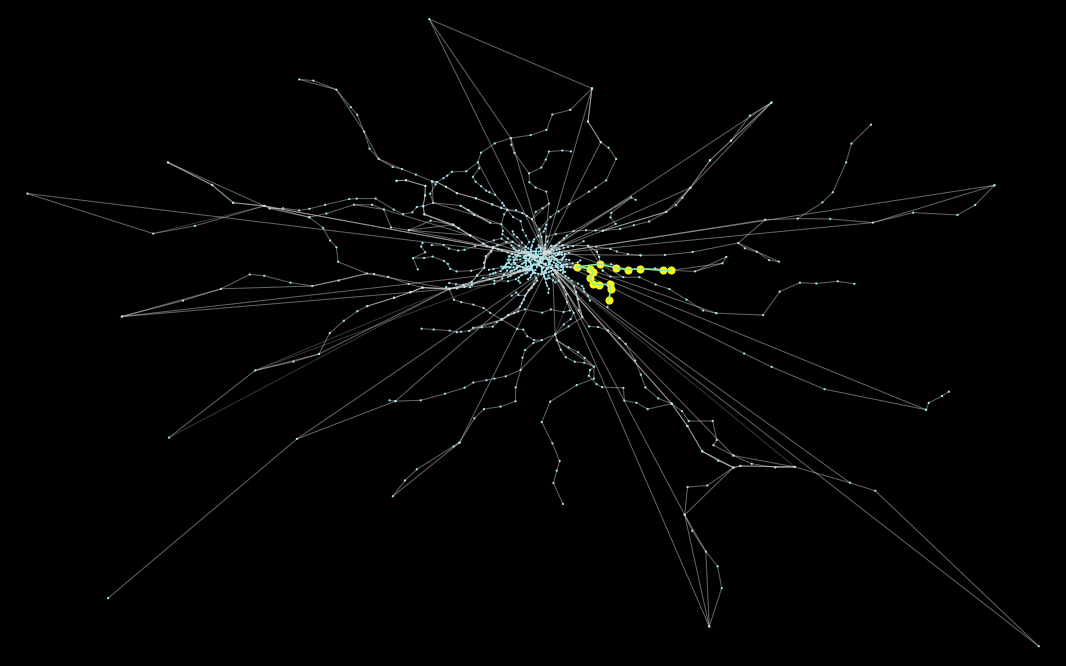

In [76]:
# Use OSMnx as it makes it super easy to plot NetworkX graphs
# of spatial data!
fig, ax=ox.plot_graph(new_feed.G,
              fig_height=12,
                show=False,
                close=False,
                node_color='#8aedfc',
                node_size=5,
                edge_color='#e2dede',
                edge_alpha=0.25,
                bgcolor='black')
ed.plot(ax=ax, color='lightgreen')
no.plot(ax=ax, color='yellow', markersize=50)

In [83]:
fd3.stops[fd3.stops['stop_name'].str.contains('LA DEFENSE')]

stop_id                 stop_name  \
515  StopPoint:8738221:800:U        GARE DE LA DEFENSE   
541  StopPoint:8775801:810:A  GARE DE LA DEFENSE RER A   
919  StopPoint:8738221:800:L        GARE DE LA DEFENSE   

                                             stop_desc   stop_lat  stop_lon  \
515  Accessible par rampe. Réservation avant la vei...  48.893490  2.238275   
541  Train accessible par rampe amovible sans réser...  48.892132  2.237583   
919  Accessible par rampe. Réservation avant la vei...  48.893490  2.238275   

    zone_id stop_url  location_type    parent_station  wheelchair_boarding  
515       3      NaN              0  StopArea:8738221                  1.0  
541       3      NaN              0  StopArea:8738221                  1.0  
919       3      NaN              0  StopArea:8738221                  1.0

In [86]:
GARE_DU_NORD=[48.879383,2.356372]
LA_DEFENSE=[48.892132,2.237583]

In [90]:
test_path=new_feed.get_shortest_path(LA_DEFENSE,GARE_DU_NORD)

NetworkXNoPath: No path to 1DS5L_StopPoint:59270.

In [96]:
new_feed.G.nodes

NodeView(('1DS5L_StopPoint:59200', '1DS5L_StopPoint:59201', '1DS5L_StopPoint:59204', '1DS5L_StopPoint:59205', '1DS5L_StopPoint:59207', '1DS5L_StopPoint:59208', '1DS5L_StopPoint:59209', '1DS5L_StopPoint:59211', '1DS5L_StopPoint:59212', '1DS5L_StopPoint:59213', '1DS5L_StopPoint:59214', '1DS5L_StopPoint:59216', '1DS5L_StopPoint:59217', '1DS5L_StopPoint:59218', '1DS5L_StopPoint:59219', '1DS5L_StopPoint:59220', '1DS5L_StopPoint:59221', '1DS5L_StopPoint:59222', '1DS5L_StopPoint:59223', '1DS5L_StopPoint:59225', '1DS5L_StopPoint:59226', '1DS5L_StopPoint:59227', '1DS5L_StopPoint:59228', '1DS5L_StopPoint:59229', '1DS5L_StopPoint:59230', '1DS5L_StopPoint:59231', '1DS5L_StopPoint:59232', '1DS5L_StopPoint:59233', '1DS5L_StopPoint:59234', '1DS5L_StopPoint:59235', '1DS5L_StopPoint:59236', '1DS5L_StopPoint:59237', '1DS5L_StopPoint:59238', '1DS5L_StopPoint:59239', '1DS5L_StopPoint:59240', '1DS5L_StopPoint:59241', '1DS5L_StopPoint:59242', '1DS5L_StopPoint:59243', '1DS5L_StopPoint:59244', '1DS5L_StopPoin

In [97]:
len(new_feed.G.nodes)

964

In [101]:
new_feed.G['1DS5L_StopPoint:59200']

AdjacencyView({'1DS5L_StopPoint:59633': {0: {'length': 102.4390243902439, 'mode': 'transit'}}, '1DS5L_StopPoint:59335': {0: {'length': 100.76712328767124, 'mode': 'transit'}}})

In [100]:
new_feed.G['1DS5L_StopPoint:59200']['1DS5L_StopPoint:59633']

AtlasView({0: {'length': 102.4390243902439, 'mode': 'transit'}})

In [2]:
inpath='C:\\Users\\76571\\Desktop\\stage\\IDFM_gtfs.zip'
outpath3='C:\\Users\\76571\\Desktop\\GTFS_RER_METRO_TRAMWAY.zip'

In [3]:
ptg.extract_feed(inpath,outpath3,{'routes.txt':{'route_type':(0,1,2)}})

'C:\\Users\\76571\\Desktop\\GTFS_RER_METRO_TRAMWAY.zip'